In [1]:
import numpy as np
import pandas as pd
import pickle
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [3]:
# 1 - старый дом, 0 - новый
def age_to_binary_cat(X):

    X['age_binary_cat'] = 0
    X.loc[X['HouseYear'] <= 2000, 'age_binary_cat'] = 1  

    return X

In [4]:
os.getcwd()

'C:\\Users\\Эль\\Desktop\\libpy\\les10'

In [5]:
ls

 ’®¬ ў гбва®©бвўҐ C Ё¬ҐҐв ¬ҐвЄг OS
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 964B-4F26

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\ќ«м\Desktop\libpy\les10

14.04.2022  13:10    <DIR>          .
14.04.2022  13:10    <DIR>          ..
13.04.2022  20:30    <DIR>          .ipynb_checkpoints
12.04.2022  13:17           689я565 10.ipynb
13.04.2022  21:45           509я442 3.ipynb
13.04.2022  21:37         6я706я641 5.ipynb
13.04.2022  21:41         3я463я298 7.ipynb
13.04.2022  21:42         5я228я371 9.ipynb
14.04.2022  13:10            19я167 les10.ipynb
13.04.2022  19:38            71я710 sample_submission.csv
13.04.2022  19:37           486я139 test.csv
13.04.2022  19:38         1я157я314 train.csv
               9 д ©«®ў     18я331я647 Ў ©в
               3 Ї Ї®Є  832я861я483я008 Ў ©в бў®Ў®¤­®


In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [8]:
train_df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
train_df.drop(columns='Id', inplace=True)
test_df.drop(columns='Id', inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Price  

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: float

In [13]:
train_df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
train_df_num_features

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0,305018.871089
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.553407
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.720850
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,168106.007630
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,52,10311,6,NaN,1,9,119367.455796
9996,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,2,629,1,NaN,0,0,199715.148807
9997,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,20,4386,14,NaN,1,5,165953.912580
9998,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,47,8004,3,125.0,3,5,171842.411855


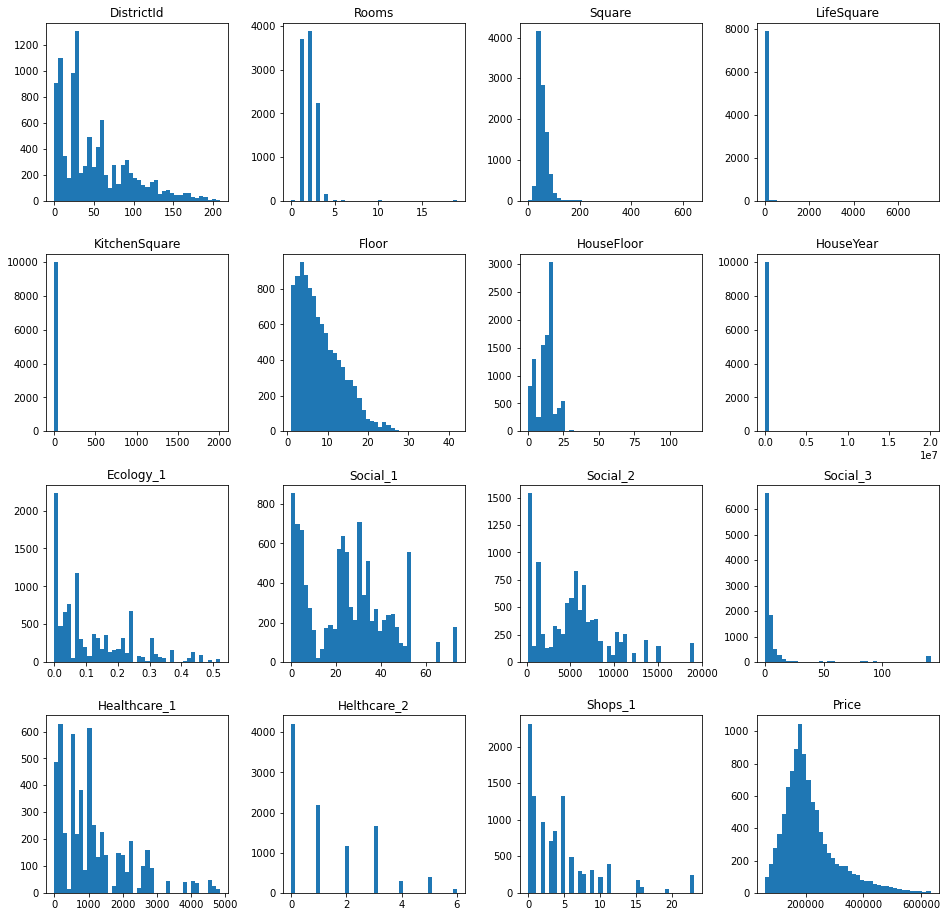

In [14]:
train_df_num_features.hist(figsize=(16,16), bins=40, grid=False);

In [15]:
train_df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
207      1
209      1
174      1
Name: DistrictId, Length: 205, dtype: int64

In [16]:
train_df_obj_features = train_df.select_dtypes(include='object')
train_df_obj_features.head()

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [17]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [18]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [19]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [20]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Ecology_2'], prefix='Ec2')], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_2'], prefix='Ec2')], axis=1)
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ec2_A,Ec2_B
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,...,11,3097,0,NaN,0,0,B,305018.871089,0,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,...,30,6207,1,1183.0,1,0,B,177734.553407,0,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,...,33,5261,0,240.0,3,1,B,282078.720850,0,1
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,...,1,264,0,NaN,0,1,B,168106.007630,0,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,...,33,8667,2,NaN,0,6,B,343995.102962,0,1


In [21]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Ecology_3'], prefix='Ec3')], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Ecology_3'], prefix='Ec3')], axis=1)
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,...,0,NaN,0,0,B,305018.871089,0,1,0,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,...,1,1183.0,1,0,B,177734.553407,0,1,0,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,...,0,240.0,3,1,B,282078.720850,0,1,0,1
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,...,0,NaN,0,1,B,168106.007630,0,1,0,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,...,2,NaN,0,6,B,343995.102962,0,1,0,1


In [22]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Shops_2'], prefix='Sh2')], axis=1)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Shops_2'], prefix='Sh2')], axis=1)
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,...,0,0,B,305018.871089,0,1,0,1,0,1
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,...,1,0,B,177734.553407,0,1,0,1,0,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,...,3,1,B,282078.720850,0,1,0,1,0,1
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,...,0,1,B,168106.007630,0,1,0,1,0,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,...,0,6,B,343995.102962,0,1,0,1,0,1


In [23]:
train_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)
test_df.drop(['Shops_2','Ecology_2','Ecology_3'], axis=1, inplace=True)

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Social_1       10000 non-null  int64  
 10  Social_2       10000 non-null  int64  
 11  Social_3       10000 non-null  int64  
 12  Healthcare_1   5202 non-null   float64
 13  Helthcare_2    10000 non-null  int64  
 14  Shops_1        10000 non-null  int64  
 15  Price          10000 non-null  float64
 16  Ec2_A          10000 non-null  uint8  
 17  Ec2_B          10000 non-null  uint8  
 18  Ec3_A  

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Social_1       5000 non-null   int64  
 10  Social_2       5000 non-null   int64  
 11  Social_3       5000 non-null   int64  
 12  Healthcare_1   2623 non-null   float64
 13  Helthcare_2    5000 non-null   int64  
 14  Shops_1        5000 non-null   int64  
 15  Ec2_A          5000 non-null   uint8  
 16  Ec2_B          5000 non-null   uint8  
 17  Ec3_A          5000 non-null   uint8  
 18  Ec3_B   

In [26]:
train_df = age_to_binary_cat(train_df)
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,...,0,0,305018.871089,0,1,0,1,0,1,0
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,...,1,0,177734.553407,0,1,0,1,0,1,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,...,3,1,282078.720850,0,1,0,1,0,1,1
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,...,0,1,168106.007630,0,1,0,1,0,1,1
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,...,0,6,343995.102962,0,1,0,1,0,1,1


In [27]:
test_df = age_to_binary_cat(test_df)
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat
0,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,...,1036.0,1,1,0,1,0,1,0,1,1
1,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,...,NaN,0,0,0,1,0,1,1,0,0
2,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,9,...,NaN,0,1,0,1,0,1,0,1,1
3,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,...,NaN,0,0,0,1,0,1,0,1,1
4,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,35,...,990.0,0,6,0,1,0,1,0,1,1


In [28]:
train_df['0'] = [x for x in range(len(train_df))]
train_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Shops_1,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
0,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,11,...,0,305018.871089,0,1,0,1,0,1,0,0
1,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,30,...,0,177734.553407,0,1,0,1,0,1,1,1
2,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,33,...,1,282078.720850,0,1,0,1,0,1,1,2
3,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,1,...,1,168106.007630,0,1,0,1,0,1,1,3
4,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,33,...,6,343995.102962,0,1,0,1,0,1,1,4


In [29]:
df_drop = train_df[['LifeSquare', '0']]
df_drop.head()

,LifeSquare,0
0,NaN,0
1,23.169223,1
2,47.671972,2
3,NaN,3
4,38.562517,4


In [30]:
target_name = 'Healthcare_1'
train_df.drop(['LifeSquare'], axis=1, inplace=True)
train_df.describe()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,50.400800,1.890500,56.315775,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,...,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500,0.746400,4999.50000
std,43.587592,0.839512,21.058732,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,...,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139,0.435093,2886.89568
min,0.000000,0.000000,1.136859,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,...,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,20.000000,1.000000,41.774881,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,...,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2499.75000
50%,36.000000,2.000000,52.513310,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,...,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4999.50000
75%,75.000000,2.000000,65.900625,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,...,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,7499.25000
max,209.000000,19.000000,641.065193,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,...,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9999.00000


In [31]:
train_df['nan'] = 0
train_df.loc[train_df[target_name].isna(), 'nan'] = 1

In [32]:
df_test = train_df[train_df['nan'] == 1]
df_train = train_df[train_df['nan'] == 0]

In [33]:
df_train.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0,nan
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,...,177734.553407,0,1,0,1,0,1,1,1,0
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,...,282078.720850,0,1,0,1,0,1,1,2,0
5,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,35,5776,...,161044.944138,0,1,0,1,0,1,1,5,0
6,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,24,4860,...,142402.739272,0,1,0,1,0,1,1,6,0
7,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,37,7687,...,326174.175191,0,1,0,1,0,1,1,7,0


In [34]:
df_test.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0,nan
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,...,305018.871089,0,1,0,1,0,1,0,0,1
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,...,168106.007630,0,1,0,1,0,1,1,3,1
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,...,343995.102962,0,1,0,1,0,1,1,4,1
8,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,264,...,160400.401732,0,1,0,1,0,1,1,8,1
11,88,2.0,53.975144,8.0,2,12.0,1978,0.127376,43,8429,...,253124.005332,0,1,0,1,0,1,1,11,1


In [35]:
df_train[target_name] = df_train[target_name].apply(int)
df_train = df_train.drop(columns='nan')

In [36]:
X = df_train.drop(columns=[target_name, '0'])
y = df_train[target_name]

Train R2:	1.0
Test R2:	0.996


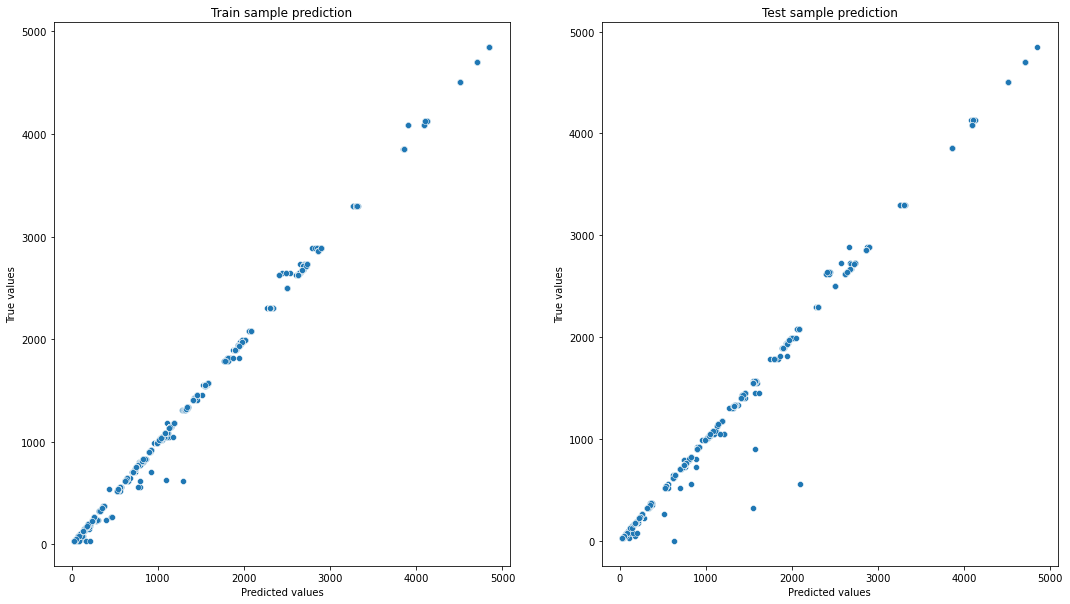

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [38]:
v = [x for x in df_test['0']]
df_test = df_test.drop(columns=[target_name, '0'])
df_test = df_test.drop(columns='nan')

In [39]:
df_test[target_name] = rf_model.predict(df_test)
df_test[target_name] = df_test[target_name].apply(int)

In [40]:
df_test['0'] = v
df_test.head(10)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,Healthcare_1,0
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,...,305018.871089,0,1,0,1,0,1,0,802,0
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,...,168106.007630,0,1,0,1,0,1,1,392,3
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,...,343995.102962,0,1,0,1,0,1,1,2088,4
8,1,1.0,46.887892,1.0,12,20.0,1977,0.007122,1,264,...,160400.401732,0,1,0,1,0,1,1,392,8
11,88,2.0,53.975144,8.0,2,12.0,1978,0.127376,43,8429,...,253124.005332,0,1,0,1,0,1,1,1842,11
14,36,3.0,81.994790,10.0,2,22.0,2008,0.087619,8,1497,...,481360.360728,0,1,0,1,0,1,0,1163,14
15,96,1.0,36.673407,9.0,3,12.0,2003,0.041116,53,14892,...,168143.345700,0,1,0,1,0,1,0,1854,15
16,48,1.0,44.825250,8.0,7,12.0,1981,0.041125,46,9515,...,207633.660287,0,1,0,1,0,1,1,1740,16
18,1,1.0,47.582480,1.0,16,16.0,1977,0.007122,1,264,...,128803.593810,0,1,0,1,0,1,1,392,18
19,45,1.0,42.367289,1.0,16,14.0,2015,0.195781,23,5212,...,250466.980777,0,1,0,1,0,1,0,1062,19


In [41]:
train_df = pd.concat([df_train, df_test]) 
train_df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,...,0,177734.553407,0,1,0,1,0,1,1,1
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,...,1,282078.720850,0,1,0,1,0,1,1,2
5,99,3.0,62.528465,6.0,9,9.0,1972,0.012339,35,5776,...,4,161044.944138,0,1,0,1,0,1,1,5
6,44,1.0,33.938750,9.0,1,12.0,1968,0.232205,24,4860,...,3,142402.739272,0,1,0,1,0,1,1,6
7,59,2.0,50.391814,8.0,8,17.0,1986,0.019509,37,7687,...,5,326174.175191,0,1,0,1,0,1,1,7


In [42]:
train_df = train_df.sort_values(by=['0'])
train_df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Price,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
0,27,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,...,0,305018.871089,0,1,0,1,0,1,0,0
1,22,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,...,0,177734.553407,0,1,0,1,0,1,1,1
2,1,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,...,1,282078.720850,0,1,0,1,0,1,1,2
3,1,1.0,40.409907,1.0,10,22.0,1977,0.007122,1,264,...,1,168106.007630,0,1,0,1,0,1,1,3
4,94,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,...,6,343995.102962,0,1,0,1,0,1,1,4


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      10000 non-null  int64  
 1   Rooms           10000 non-null  float64
 2   Square          10000 non-null  float64
 3   KitchenSquare   10000 non-null  float64
 4   Floor           10000 non-null  int64  
 5   HouseFloor      10000 non-null  float64
 6   HouseYear       10000 non-null  int64  
 7   Ecology_1       10000 non-null  float64
 8   Social_1        10000 non-null  int64  
 9   Social_2        10000 non-null  int64  
 10  Social_3        10000 non-null  int64  
 11  Healthcare_1    10000 non-null  int64  
 12  Helthcare_2     10000 non-null  int64  
 13  Shops_1         10000 non-null  int64  
 14  Price           10000 non-null  float64
 15  Ec2_A           10000 non-null  uint8  
 16  Ec2_B           10000 non-null  uint8  
 17  Ec3_A           10000 non-null  

In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      5000 non-null   int64  
 1   Rooms           5000 non-null   float64
 2   Square          5000 non-null   float64
 3   LifeSquare      3959 non-null   float64
 4   KitchenSquare   5000 non-null   float64
 5   Floor           5000 non-null   int64  
 6   HouseFloor      5000 non-null   float64
 7   HouseYear       5000 non-null   int64  
 8   Ecology_1       5000 non-null   float64
 9   Social_1        5000 non-null   int64  
 10  Social_2        5000 non-null   int64  
 11  Social_3        5000 non-null   int64  
 12  Healthcare_1    2623 non-null   float64
 13  Helthcare_2     5000 non-null   int64  
 14  Shops_1         5000 non-null   int64  
 15  Ec2_A           5000 non-null   uint8  
 16  Ec2_B           5000 non-null   uint8  
 17  Ec3_A           5000 non-null   u

In [45]:
test_df['0'] = [x for x in range(len(test_df))]
test_df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
0,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,24,...,1,1,0,1,0,1,0,1,1,0
1,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,2,...,0,0,0,1,0,1,1,0,0,1
2,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,9,...,0,1,0,1,0,1,0,1,1,2
3,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,2,...,0,0,0,1,0,1,0,1,1,3
4,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,35,...,0,6,0,1,0,1,0,1,1,4


In [46]:
df_drop2 = test_df[['LifeSquare', '0']]
df_drop2.head()

,LifeSquare,0
0,19.094182,0
1,42.568133,1
2,NaN,2
3,33.893825,3
4,NaN,4


In [47]:
test_df.drop(['LifeSquare'], axis=1, inplace=True)
test_df.describe()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Helthcare_2,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,51.279200,1.910000,56.449500,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,...,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600,0.753200,2499.500000
std,44.179466,0.838594,19.092787,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,...,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001,0.431192,1443.520003
min,0.000000,0.000000,1.378543,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.000000,41.906231,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,...,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1249.750000
50%,37.000000,2.000000,52.921340,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,...,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2499.500000
75%,77.000000,2.000000,66.285129,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,...,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3749.250000
max,212.000000,17.000000,223.453689,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,...,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4999.000000


In [48]:
test_df['nan'] = 0
test_df.loc[test_df[target_name].isna(), 'nan'] = 1

In [49]:
test_df0 = test_df[test_df['nan'] == 0]
df_test2 = test_df[test_df['nan'] == 1]
df_test2.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0,nan
1,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,2,629,...,0,0,1,0,1,1,0,0,1,1
2,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,9,1892,...,1,0,1,0,1,0,1,1,2,1
3,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,2,475,...,0,0,1,0,1,0,1,1,3,1
6,62,1.0,46.269456,11.0,8,17.0,2014,0.072158,2,629,...,0,0,1,0,1,1,0,0,6,1
7,2,2.0,48.172969,6.0,4,9.0,1974,0.000000,33,7425,...,5,0,1,0,1,0,1,1,7,1


In [50]:
X = train_df.drop(columns=[target_name, '0', 'Price'])
y = train_df[target_name]

Train R2:	1.0
Test R2:	0.998


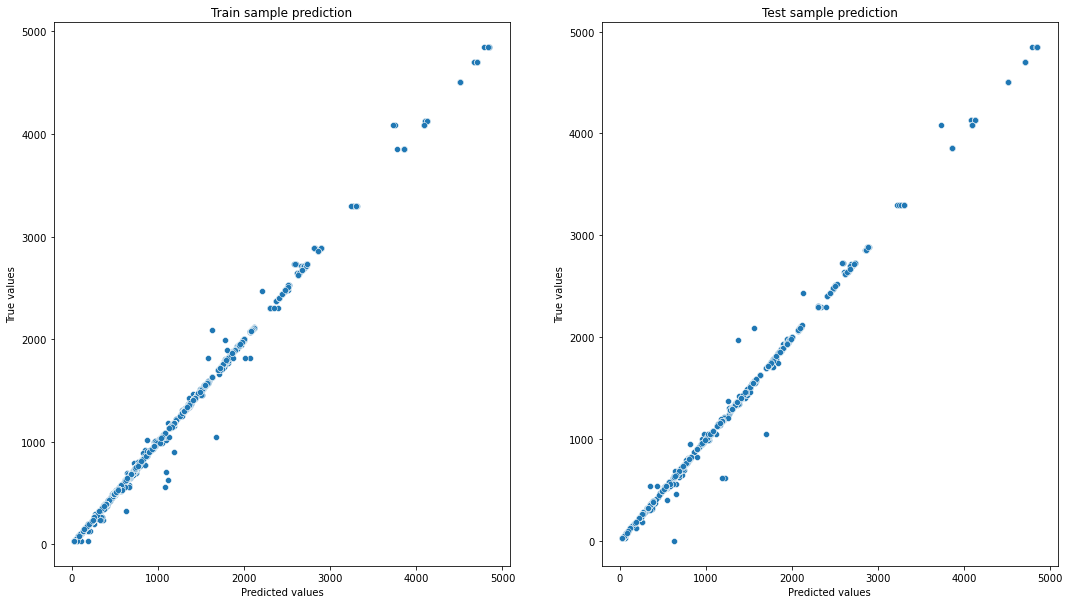

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=21)

rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [52]:
v = [x for x in df_test2['0']]
df_test2 = df_test2.drop(columns=[target_name, '0'])
df_test2 = df_test2.drop(columns='nan')

In [53]:
df_test2[target_name] = rf_model.predict(df_test2)
df_test2[target_name] = df_test2[target_name].apply(int)

In [54]:
df_test2['0'] = v
df_test2.head(10)

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,Healthcare_1,0
1,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,2,629,...,0,0,1,0,1,1,0,0,509,1
2,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,9,1892,...,1,0,1,0,1,0,1,1,738,2
3,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,2,475,...,0,0,1,0,1,0,1,1,343,3
6,62,1.0,46.269456,11.0,8,17.0,2014,0.072158,2,629,...,0,0,1,0,1,1,0,0,509,6
7,2,2.0,48.172969,6.0,4,9.0,1974,0.000000,33,7425,...,5,0,1,0,1,0,1,1,682,7
8,1,1.0,43.153761,9.0,10,17.0,2014,0.007122,1,264,...,1,0,1,0,1,0,1,0,387,8
9,62,2.0,62.593787,10.0,1,16.0,1981,0.002212,39,7614,...,5,0,1,0,1,1,0,1,622,9
12,96,4.0,87.776382,10.0,25,24.0,2014,0.041116,53,14892,...,4,0,1,0,1,0,1,0,1854,12
13,74,1.0,54.614170,1.0,8,17.0,1977,0.075779,6,1437,...,2,0,1,0,1,0,1,1,1567,13
14,27,1.0,44.415510,1.0,14,1.0,1977,0.072158,2,629,...,0,0,1,0,1,1,0,1,491,14


In [55]:
test_df = pd.concat([test_df0, df_test2]) 
test_df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0,nan
0,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,24,4378,...,1,0,1,0,1,0,1,1,0,0.0
4,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,35,7715,...,6,0,1,0,1,0,1,1,4,0.0
5,38,3.0,87.139994,10.0,4,23.0,2011,0.060753,15,2787,...,7,0,1,0,1,0,1,0,5,0.0
10,8,1.0,41.496509,7.0,4,17.0,2009,0.437885,23,5735,...,5,0,1,0,1,0,1,0,10,0.0
11,9,3.0,80.599472,1.0,4,1.0,1977,0.161532,25,5648,...,4,0,1,0,1,0,1,1,11,0.0


In [56]:
test_df = test_df.sort_values(by=['0'])
test_df.head()

,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,...,Shops_1,Ec2_A,Ec2_B,Ec3_A,Ec3_B,Sh2_A,Sh2_B,age_binary_cat,0,nan
0,44,1.0,36.847630,5.0,5,9.0,1970,0.036122,24,4378,...,1,0,1,0,1,0,1,1,0,0.0
1,62,1.0,42.493907,10.0,7,17.0,2017,0.072158,2,629,...,0,0,1,0,1,1,0,0,1,NaN
2,27,2.0,59.463678,9.0,19,19.0,1977,0.211401,9,1892,...,1,0,1,0,1,0,1,1,2,NaN
3,23,3.0,49.646030,6.0,2,2.0,1965,0.014073,2,475,...,0,0,1,0,1,0,1,1,3,NaN
4,74,1.0,53.837056,1.0,8,17.0,1977,0.309479,35,7715,...,6,0,1,0,1,0,1,1,4,0.0


In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DistrictId      5000 non-null   int64  
 1   Rooms           5000 non-null   float64
 2   Square          5000 non-null   float64
 3   KitchenSquare   5000 non-null   float64
 4   Floor           5000 non-null   int64  
 5   HouseFloor      5000 non-null   float64
 6   HouseYear       5000 non-null   int64  
 7   Ecology_1       5000 non-null   float64
 8   Social_1        5000 non-null   int64  
 9   Social_2        5000 non-null   int64  
 10  Social_3        5000 non-null   int64  
 11  Healthcare_1    5000 non-null   float64
 12  Helthcare_2     5000 non-null   int64  
 13  Shops_1         5000 non-null   int64  
 14  Ec2_A           5000 non-null   uint8  
 15  Ec2_B           5000 non-null   uint8  
 16  Ec3_A           5000 non-null   uint8  
 17  Ec3_B           5000 non-null   u

In [58]:
test_df = test_df.drop(columns='nan')
test_df = test_df.drop(columns='0')
train_df = train_df.drop(columns='0')

In [59]:
# train_df = train_df.merge(df_drop, left_on='0', right_on='0', how='left')
# test_df = test_df.merge(df_drop2, left_on='0', right_on='0', how='left')

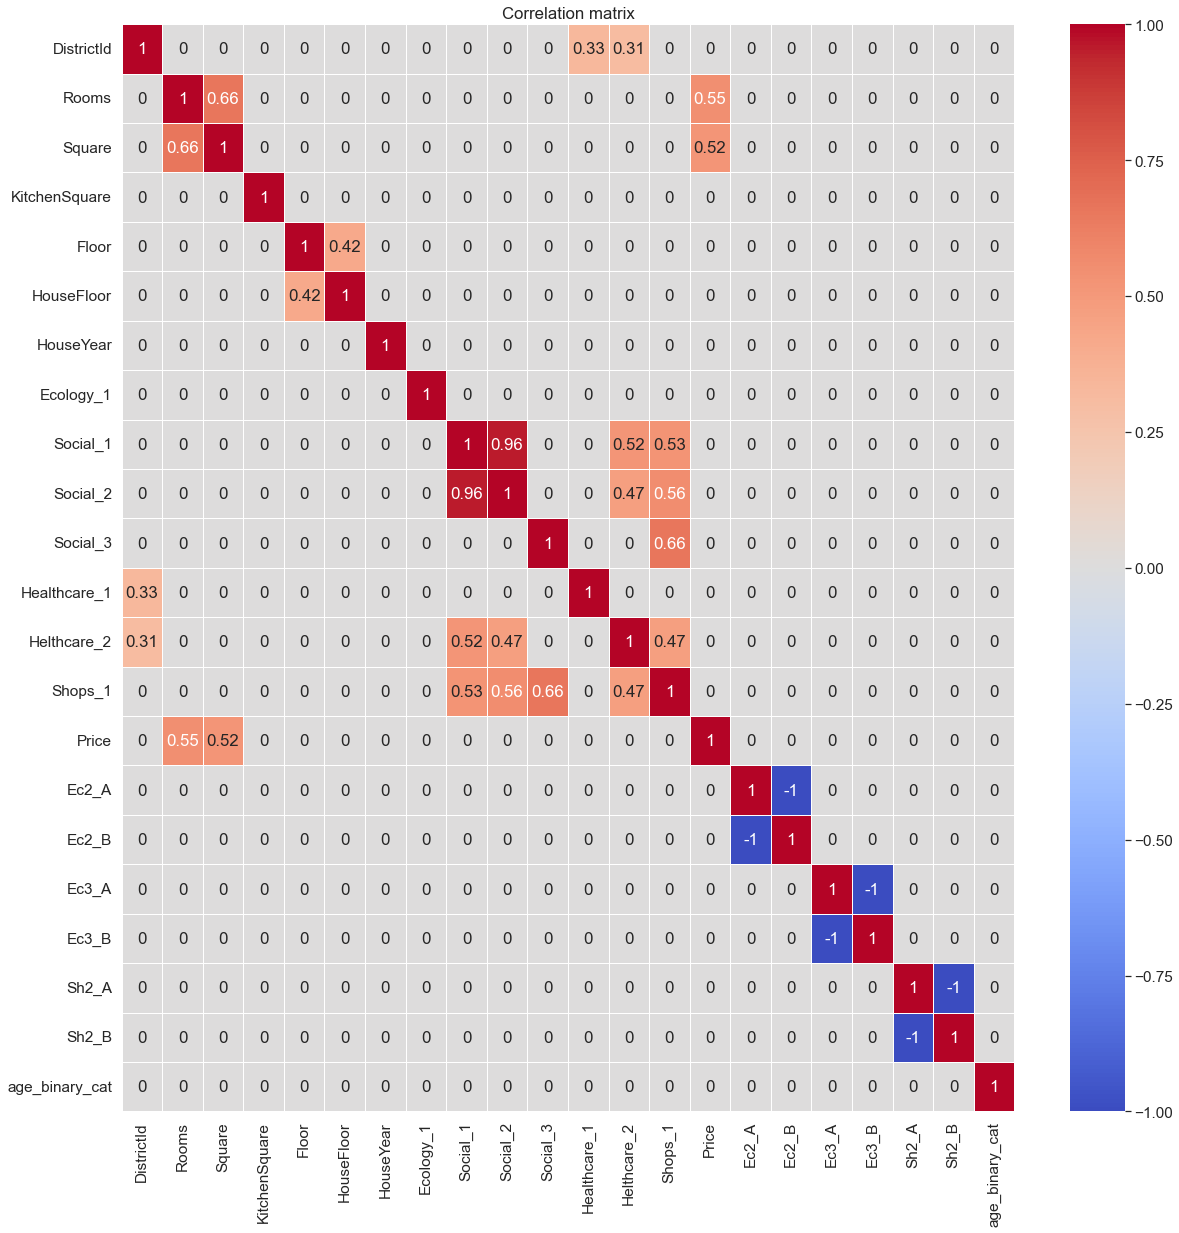

In [60]:
plt.figure(figsize = (20,20))

sns.set(font_scale=1.4)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [61]:
target_name = 'Price'

In [62]:
X = train_df.drop(columns=target_name)
y = train_df[target_name]

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [64]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.959
Test R2:	0.736


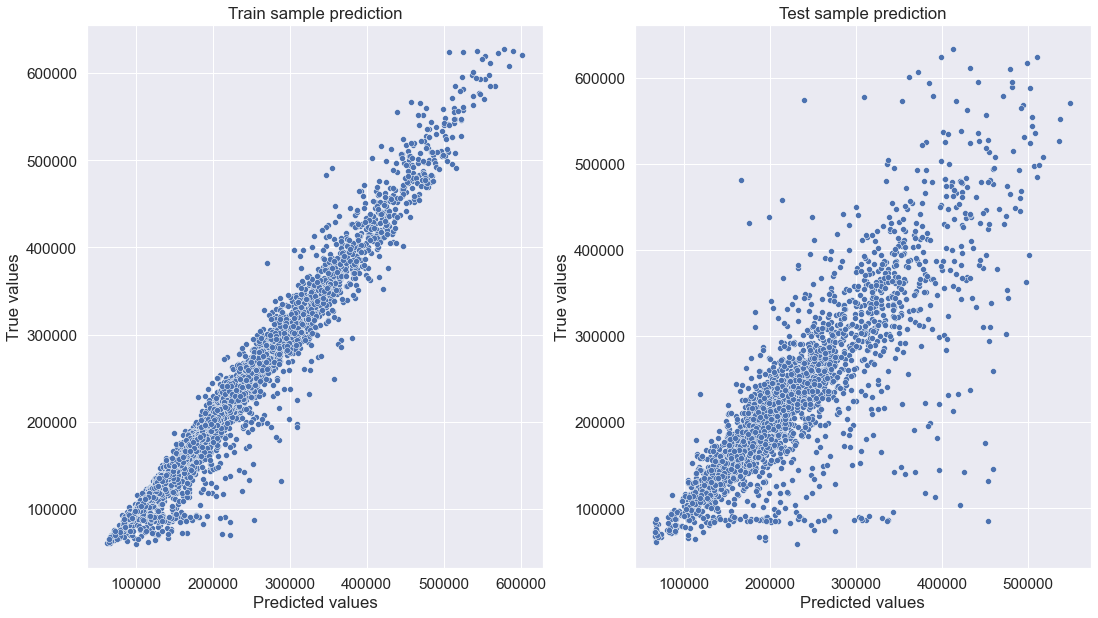

In [65]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [66]:
y_test = rf_model.predict(test_df)
y_test

array([165708.17846265, 121876.10268296, 137983.14605044, ...,
       147311.67474118, 188429.56326731, 282784.05946183])

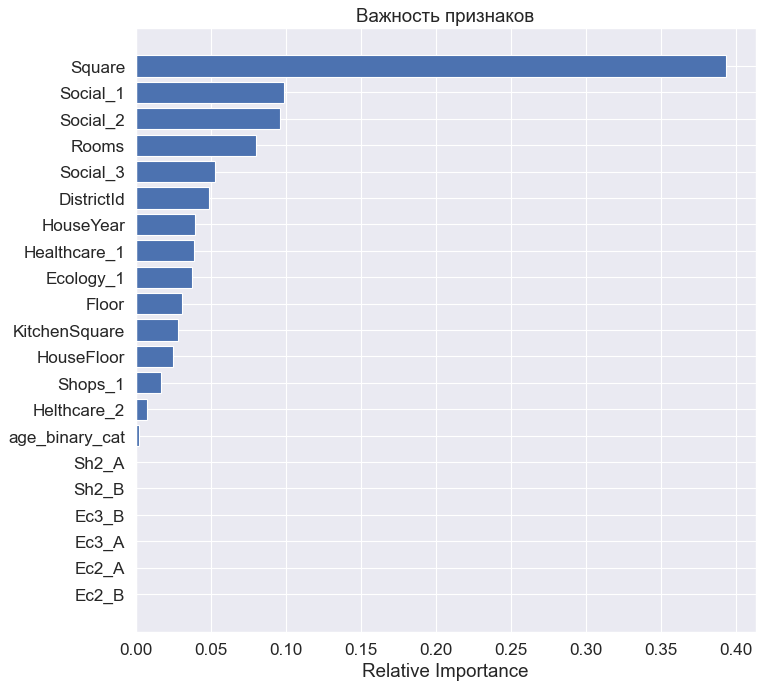

In [67]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10), dpi=80)
plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
feature_names = X_train.columns
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [68]:
submit = pd.read_csv('sample_submission.csv')

In [69]:
submit['Price'] = y_test
submit.head()

,Id,Price
0,4567,165708.178463
1,5925,121876.102683
2,960,137983.146050
3,3848,132125.960059
4,746,214533.938934


In [70]:
submit.to_csv('rf_rs21_submit.csv', index=False)

In [71]:
# R2: 0.736
# На kaggle ответ отправлю, когда техподдержка поможет с ошибкой верификации номера телефона 
# (не могу присоединиться к соревнованию из-за нее)